In [11]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
import matplotlib.cm as cm
import datetime 
import time
from scipy.fft import fft, ifft, fftshift
from scipy.fftpack import fftfreq
import gc

In [118]:
test = np.asarray([1,1,1,1,0,0,0,0,2,2,2,2])
test_daily = test.reshape(-1,4)
print(test_daily.shape)
print(test_daily[2])

(3, 4)
[2 2 2 2]


In [4]:
import numpy as np
import h5py
import os

# Define the list of variables to process
variables = ["v_prime_b_prime"]  # Add or remove variables as needed

# Define the PR values to process
PR_values = [0, 10, 20, 30, 40, 50]  # Modify PR values as needed
# PR_values = [0]  # Modify PR values as needed


# Base input/output directories
base_input_dir = "/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF"
base_output_dir = "/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean"

# Loop over each PR value
for PR in PR_values:
    # Loop over each variable
    for var in variables:
        # Construct the input file path
        # input_file = os.path.join(base_input_dir, f"PR{PR}", var, f"PR{PR}_500_20000day_6hourly_{var}.dat")
        input_file = os.path.join(base_input_dir, f"PR{PR}", var, f"PR{PR}_500_20000day_6hourly_{var}_zonal_mean.dat")

        # Load the 6-hourly data
        with h5py.File(input_file, "r") as var_file:
            var_6hourly = np.asarray(var_file[var][:,:,:])
        
        # Reshape the time dimension to group every 4 time steps (daily mean)
        if var == "prec":
            var_daily = var_6hourly.reshape(-1, 4, var_6hourly.shape[1], var_6hourly.shape[2]).mean(axis=1)
        else:
            # var_daily = var_6hourly.reshape(-1, 4, var_6hourly.shape[1], var_6hourly.shape[2], var_6hourly.shape[3]).mean(axis=1)
            var_daily = var_6hourly.reshape(-1, 4, var_6hourly.shape[1], var_6hourly.shape[2]).mean(axis=1)

        # Print the shape of the daily mean data for verification
        print(f"Shape of daily mean {var} wind data for PR{PR}: {var_daily.shape}")
        
        # Create the output directory if it doesn't exist
        output_dir = os.path.join(base_output_dir, f"PR{PR}", var)
        os.makedirs(output_dir, exist_ok=True)
        
        # Construct the output file path
        output_file = os.path.join(output_dir, f"PR{PR}_500_20000day_{var}_daily.dat")
        # output_file = os.path.join(output_dir, f"PR{PR}_500_20000day_{var}_daily_zonal_mean.dat")
        
        
        # Save the daily mean data to the output file
        with h5py.File(output_file, "w") as f:
            f.create_dataset(var, data=var_daily)
        
        # Print confirmation
        print(f"Daily mean {var} data for PR{PR} saved to {output_file}")

# Optional: Read and verify the saved data (example for one file)
# with h5py.File(output_file, "r") as u_file0:
#     v = np.asarray(u_file0[var][:,:,:])
#     print(f"Read data shape from {output_file}: {v.shape}")


Shape of daily mean v_prime_b_prime wind data for PR0: (19500, 20, 64)
Daily mean v_prime_b_prime data for PR0 saved to /data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/PR0/v_prime_b_prime/PR0_500_20000day_v_prime_b_prime_daily_zonal_mean.dat
Shape of daily mean v_prime_b_prime wind data for PR10: (19500, 20, 64)
Daily mean v_prime_b_prime data for PR10 saved to /data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/PR10/v_prime_b_prime/PR10_500_20000day_v_prime_b_prime_daily_zonal_mean.dat
Shape of daily mean v_prime_b_prime wind data for PR20: (19500, 20, 64)
Daily mean v_prime_b_prime data for PR20 saved to /data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/PR20/v_prime_b_prime/PR20_500_20000day_v_prime_b_prime_daily_zonal_mean.dat
Shape of daily mean v_prim

In [ ]:
# To do EKE
for PR in range(10,60,10):
    u_common_path = f'/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/PR{PR}/u'
    v_common_path = f'/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/PR{PR}/v'
    
    u_file = os.path.join(u_common_path, f"PR{PR}_500_20000day_u_daily.dat")
    v_file = os.path.join(v_common_path, f"PR{PR}_500_20000day_v_daily.dat")
    
    
    # Load the 6-hourly data
    with h5py.File(u_file, "r") as u_file, h5py.File(v_file, "r") as v_file:
        u_daily = np.asarray(u_file["u"][:,:,:])
        v_daily = np.asarray(v_file["v"][:,:,:])

    # u_daily = u_6hourly # .reshape(-1, 4, u_6hourly.shape[1], u_6hourly.shape[2], u_6hourly.shape[3]).mean(axis=1)
    # v_daily = v_6hourly # .reshape(-1, 4, v_6hourly.shape[1], v_6hourly.shape[2], v_6hourly.shape[3]).mean(axis=1)

    k = 0.5 * (u_daily**2 + v_daily**2)

    print(k.shape)

    output_mean_file = f'/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/PR{PR}/EKE/PR{PR}_500_20000day_EKE_daily.dat'
    with h5py.File(output_mean_file, "w") as f:
        f.create_dataset("EKE", data=k)

    output_mean_file = f'/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/PR{PR}/EKE/PR{PR}_500_20000day_EKE_daily_zonal_mean.dat'
    with h5py.File(output_mean_file, "w") as f:
        f.create_dataset("EKE", data=k.mean(axis=3))
        
    output_mean_file = f'/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/PR{PR}/EKE/PR{PR}_500_20000day_EKE_daily_zonal_mean_time_mean.dat'
    with h5py.File(output_mean_file, "w") as f:
        f.create_dataset("EKE", data=k.mean(axis=(0,3)))
    
    output_mean_file = f'/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/PR{PR}/EKE/PR{PR}_500_20000day_EKE_daily_only_y.dat'
    with h5py.File(output_mean_file, "w") as f:
        f.create_dataset("EKE", data=k.mean(axis=(0,1,3)))

In [ ]:
import os
import numpy as np
import h5py

# Loop through PR values
for PR in range(0, 60, 10):
    # Common paths for u and v data
    common_path = f'/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/PR{PR}'
    
    u_file = os.path.join(common_path, f"u/PR{PR}_500_20000day_6hourly_u.dat")
    v_file = os.path.join(common_path, f"v/PR{PR}_500_20000day_6hourly_v.dat")
    
    # Load u and v daily data
    with h5py.File(u_file, "r") as u_f, h5py.File(v_file, "r") as v_f:
        u_6hourly = np.asarray(u_f["u"][:])
        v_6hourly = np.asarray(v_f["v"][:])

    # Calculate EKE
    k_6hourly = 0.5 * (u_6hourly**2 + v_6hourly**2)
    k_daily = k_6hourly.reshape(-1, 4, k_6hourly.shape[1], k_6hourly.shape[2], k_6hourly.shape[3]).mean(axis=1)

    # Calculate different means to save
    k_zonal_mean = k_daily.mean(axis=3)  # Mean over longitude (axis 3)
    k_time_mean_zonal = k_daily.mean(axis=(0, 3))  # Mean over time and longitude
    k_only_y = k_daily.mean(axis=(0, 1, 3))  # Mean over time, height (z), and longitude

    # Path for output EKE data
    eke_path = os.path.join(common_path, 'EKE')
    os.makedirs(eke_path, exist_ok=True)

    # Write all outputs in one go
    output_files = {
        "EKE_daily": k,
        "EKE_daily_zonal_mean": k_zonal_mean,
        "EKE_daily_zonal_mean_time_mean": k_time_mean_zonal,
        "EKE_daily_only_y": k_only_y
    }

    # Save each dataset in a loop
    for name, data in output_files.items():
        output_file = os.path.join(eke_path, f"PR{PR}_500_20000day_{name}.dat")
        with h5py.File(output_file, "w") as f:
            f.create_dataset("EKE", data=data)

    print(f"Processed and saved EKE data for PR{PR}.")


Processed and saved EKE data for PR0.


In [10]:
for PR in range(10,60,10):
    prec_file = f"/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/PR{PR}/prec/PR{PR}_500_20000day_prec_daily.dat"
    with h5py.File(prec_file, "r") as f:
        prec = np.asarray(f["prec"][:])
        
    output_file = f"/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/PR{PR}/prec/PR{PR}_500_20000day_prec_daily_only_y.dat"
    with h5py.File(output_file, "w") as f:
        f.create_dataset("prec", data=prec.mean(axis=(0,2)))

In [8]:
prec.shape

(19500, 64, 128)

In [89]:
# Function to calculate EOF and PC
def Cal_EOF_PC(input_data):
    from EOF import EOF
    
    # Perform latitude weighting
    input_data_weighted = input_data * np.sqrt(np.cos(np.deg2rad(np.linspace(0, 90, input_data.shape[2]))))

    # Initialize an EOF instance with weighted input data
    n_component = min(input_data.shape[0], input_data.size // input_data.shape[0])

    print("n_component:", n_component)
    eof_instance = EOF((input_data_weighted,), n_components=n_component, field="2D")
    
    # Compute EOFs and PCs
    eof_instance.get()
    
    # Retrieve EOFs and PCs and Extract EOF1, PC1, EOF2, and PC2
    EOF1, EOF2 = eof_instance.EOF[:2]
    PC1, PC2 = eof_instance.PC[:2]

    # Normalize PCs and EOFs
    PC1_norm, PC2_norm = (PC1 - PC1.mean()) / PC1.std(), (PC2 - PC2.mean()) / PC2.std()
    EOF1_norm, EOF2_norm = EOF1 * PC1.std(), EOF2 * PC2.std()
    
    return EOF1_norm.reshape(20,32), PC1_norm, EOF2_norm.reshape(20,32), PC2_norm, eof_instance.explained[:10]
##########################################################################################
def autocorr1(x,lags, spilt_to_chunk, window_length):
    if spilt_to_chunk == False:
        print("hihi")
        corr = np.zeros(int(lags))
        for l in range(lags):
            if l == 0:
                corr[l] = 1.
            else:
                corr[l] = np.corrcoef(x[l:],x[:-l])[0][1]
        return np.array(corr)
    if spilt_to_chunk == True:
        window_number = int(np.shape(x)[0] / window_length)
        if window_number * window_length != np.shape(x)[0]:
            x_window = np.zeros((window_number, window_length))
            #x_window[-1,-(np.shape(x)[0]- window_number * window_length):] = x[int(window_number * window_length):]
        else:
            x_window = np.zeros((window_number, window_length))
        for i in range(window_number):
            print(i)
            x_window[i,:] = x[i*window_length:(i+1)*window_length]


        corr = np.zeros((window_number , int(lags)))

        for i in range(window_number):
            for l in range(lags):
                if l == 0:
                    corr[i,l] = 1.
                else:
                    corr[i,l] = np.corrcoef(x_window[i,l:],x_window[i,:-l])[0][1]
        return np.array(corr).mean(axis=0)
####################################################################################
import matplotlib.colors as colors
import matplotlib as mpl
### for color
rgb=([112,115,115])
rgb=np.array(rgb)/255.0
icmap=colors.ListedColormap(rgb,name='my_color')
cmap=mpl.cm.viridis

cmap_color=icmap  
# bound=[1E-4,10E-4,25E-4,50e-4,100E-4,150E-4,200E-4,250e-4]
colors = np.array([[112,115,115],[182,203,227],[89,159,218],[0,83,170],[0,4,167],[0,140,1]])/255
########

In [57]:
EOF1, PC1, EOF2, PC2, explained_variance = Cal_EOF_PC(u[:,:,32:])

n_component: 640


In [58]:
radius  = 6.37122e6
y = np.linspace(-90,90,64)
yd = np.deg2rad(y)
cy = np.cos(yd)
# cy [0] = np.nan
# cy [-1] = np.nan

dmdy = np.zeros((((6, 19500, 20, 64))))
print(dmdy.shape)
for a in range(1):
    Mzm = EMF#[a]
    for i in range(1,64-1):
        Mzm[:,:,i] = cy[i]**0.5 * Mzm[:,:,i]
    
    for i in range(1,64-1):
        dmdy[a,:,:,i] = -(Mzm[:,:,i+1] * (cy[i]**2) - Mzm[:,:,i-1]* (cy[i]**2)) / (radius * (cy[i]**2) * (yd[i+1] - yd[i-1]))
        # print(a * (yd[i+1]))
    dmdy[a,:,:, 0] = -(Mzm[:,:, 1]* (cy[i]**2) - Mzm[:,:, 0]* (cy[i]**2)) / (radius* cy[i]**2 *(yd[ 1] - yd[ 0]))
    dmdy[a,:,:,-1] = -(Mzm[:,:,-1]* (cy[i]**2) - Mzm[:,:,-2]* (cy[i]**2)) / (radius* cy[i]**2 *(yd[-1] - yd[-2]))

(6, 19500, 20, 64)


In [60]:
dmdy.shape

(6, 19500, 20, 64)

In [68]:
m = EOF1.reshape(20*32).dot(dmdy[0,:,:,32:].reshape(19500, 32*20).T)

In [71]:
m_final = (m - m.mean()) / m.std()

In [76]:
auto_length = 100
window_length = 5000
spilt_to_chunk = False
yyy_thin  = autocorr1(m[:], auto_length, spilt_to_chunk, window_length) 


hihi


In [87]:
tau_full = np.arange(-auto_length+1,auto_length,1)
yyy_thin_full = np.zeros(int(auto_length-1)*2+1) # 41
yyy_thin_full[int((len(yyy_thin_full)+1)/2):]   = yyy_thin[1:]
yyy_thin_full[:int((len(yyy_thin_full)+1)/2)]  = yyy_thin[::-1]



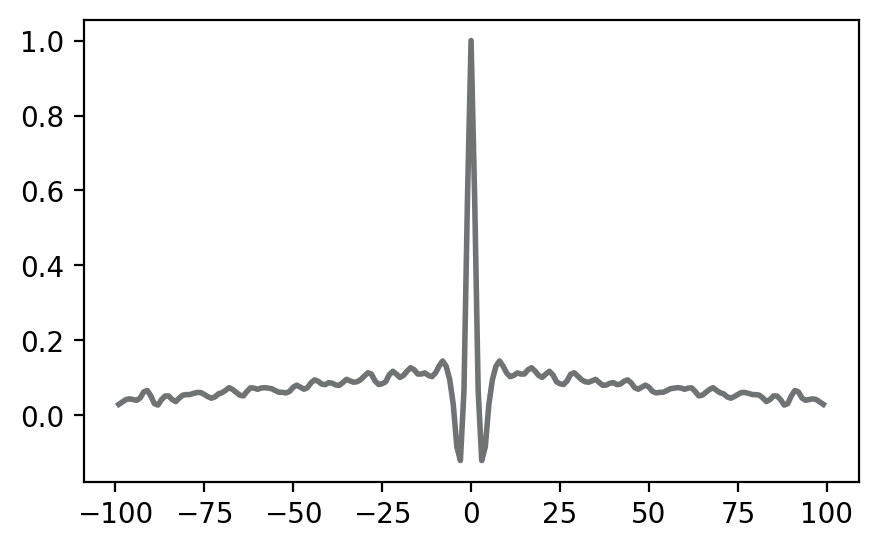

In [88]:
fig, ax = plt.subplots(1,figsize=(5,3),dpi=200)
ax.plot(tau_full, yyy_thin_full , label="L = Dry", color=colors[0], lw=2)


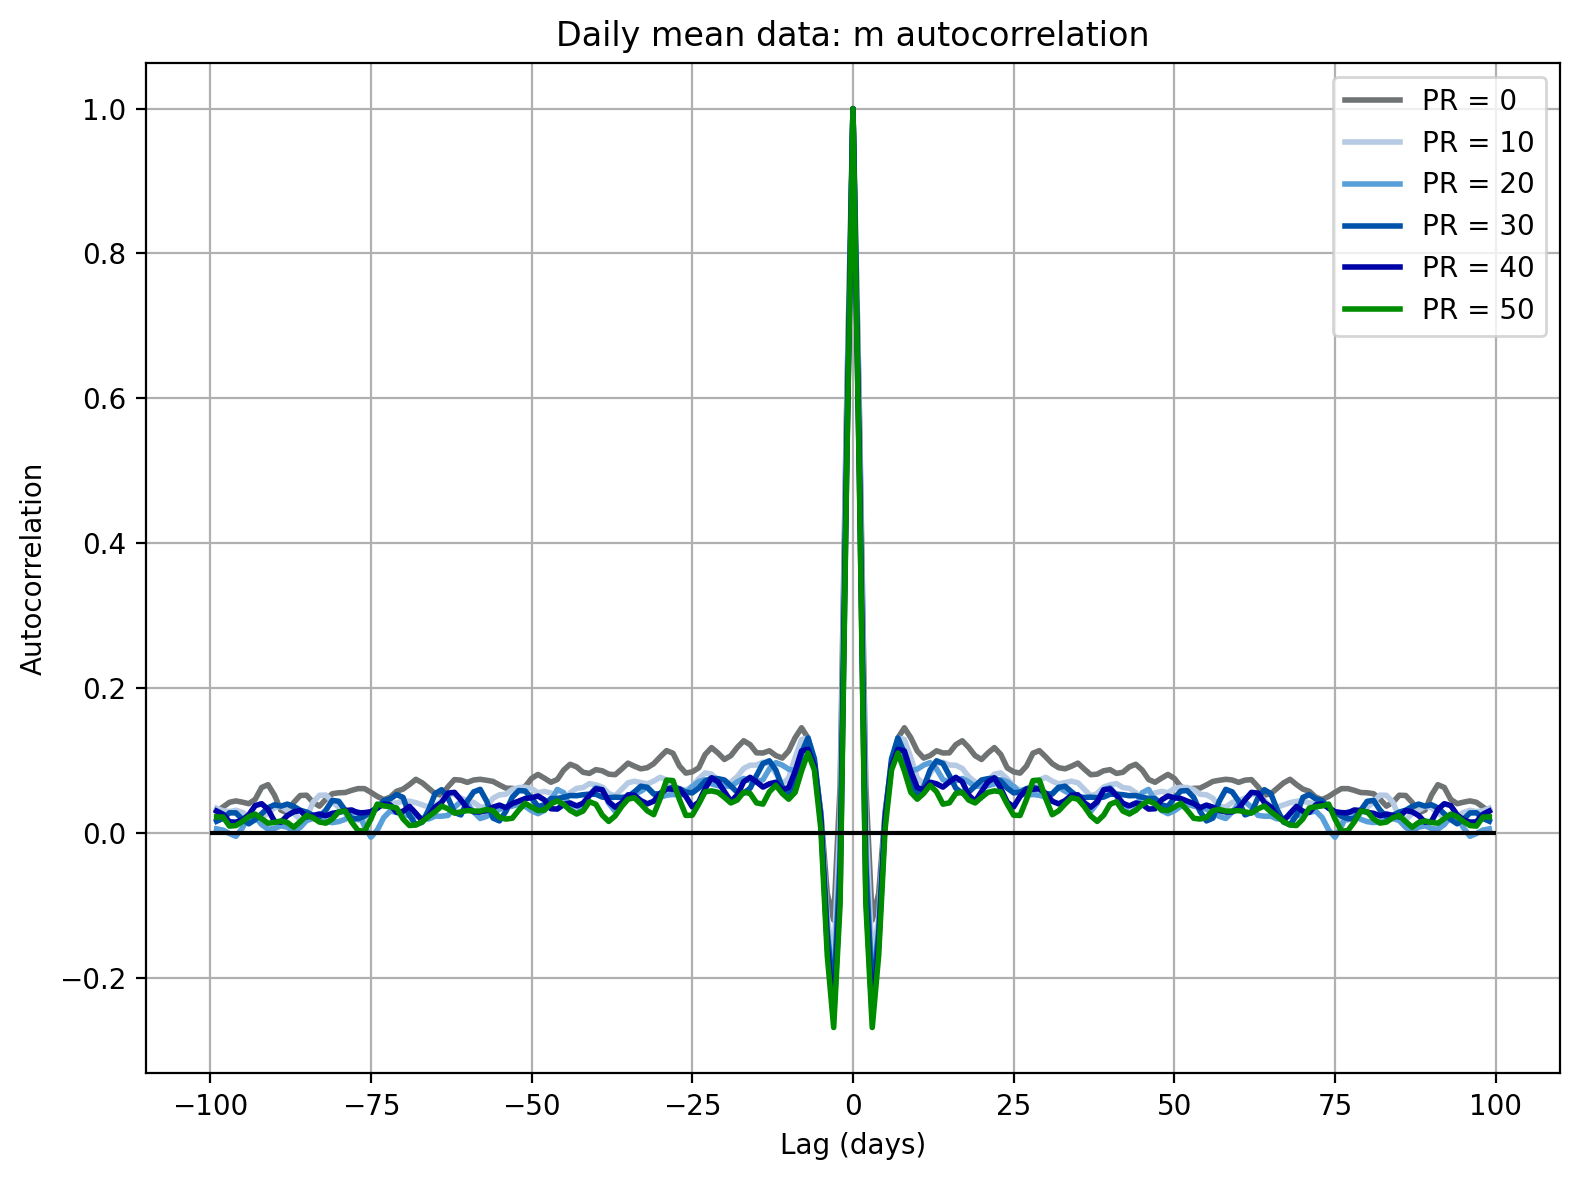

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
import matplotlib.cm as cm
import datetime 
import time
from scipy.fft import fft, ifft, fftshift
from scipy.fftpack import fftfreq
import gc
import matplotlib.colors as colors
import matplotlib as mpl

# Constants
radius = 6.37122e6
y = np.linspace(-90, 90, 64)
yd = np.deg2rad(y)
cy = np.cos(yd)
PR_values = range(0, 60, 10)  # PR values from 0 to 50

# Colors for different PR values
colors = np.array([[112,115,115],[182,203,227],[89,159,218],[0,83,170],[0,4,167],[0,140,1]]) / 255

# Function to calculate EOF and PC
def Cal_EOF_PC(input_data):
    from EOF import EOF
    
    input_data_weighted = input_data * np.sqrt(np.cos(np.deg2rad(np.linspace(0, 90, input_data.shape[2]))))
    n_component = min(input_data.shape[0], input_data.size // input_data.shape[0])

    eof_instance = EOF((input_data_weighted,), n_components=n_component, field="2D")
    eof_instance.get()

    EOF1, EOF2 = eof_instance.EOF[:2]
    PC1, PC2 = eof_instance.PC[:2]

    PC1_norm, PC2_norm = (PC1 - PC1.mean()) / PC1.std(), (PC2 - PC2.mean()) / PC2.std()
    EOF1_norm, EOF2_norm = EOF1 * PC1.std(), EOF2 * PC2.std()
    
    return EOF1_norm.reshape(20,32), PC1_norm, EOF2_norm.reshape(20,32), PC2_norm, eof_instance.explained[:10]

# Function to calculate autocorrelation
def autocorr1(x, lags, spilt_to_chunk, window_length):
    if not spilt_to_chunk:
        corr = np.zeros(int(lags))
        for l in range(lags):
            if l == 0:
                corr[l] = 1.
            else:
                corr[l] = np.corrcoef(x[l:], x[:-l])[0][1]
        return np.array(corr)
    else:
        window_number = int(np.shape(x)[0] / window_length)
        x_window = np.zeros((window_number, window_length))
        for i in range(window_number):
            x_window[i, :] = x[i*window_length:(i+1)*window_length]

        corr = np.zeros((window_number, int(lags)))
        for i in range(window_number):
            for l in range(lags):
                if l == 0:
                    corr[i, l] = 1.
                else:
                    corr[i, l] = np.corrcoef(x_window[i, l:], x_window[i, :-l])[0][1]
        return np.array(corr).mean(axis=0)

# Initialize the plot
fig, ax = plt.subplots(1, figsize=(8, 6), dpi=200)

# Loop over PR values
for idx, PR in enumerate(PR_values):
    # Load EMF and u data
    emf_file = f"/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/PR{PR}/EMF/PR{PR}_500_20000day_EMF_zonal_mean_daily.dat"
    with h5py.File(emf_file, "r") as u_file0:
        EMF = np.asarray(u_file0["EMF"][:,:,:])

    u_file = f"/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/PR{PR}/u/PR{PR}_500_20000day_u_zonal_mean_daily.dat"
    with h5py.File(u_file, "r") as u_file0:
        u = np.asarray(u_file0["u"][:,:,:])

    # Calculate EOF and PC
    EOF1, PC1, EOF2, PC2, explained_variance = Cal_EOF_PC(u[:,:,32:])

    # Prepare data for autocorrelation
    dmdy = np.zeros((6, 19500, 20, 64))
    for a in range(1):
        Mzm = EMF
        for i in range(1, 64-1):
            Mzm[:,:,i] = cy[i]**0.5 * Mzm[:,:,i]
        
        for i in range(1, 64-1):
            dmdy[a,:,:,i] = -(Mzm[:,:,i+1] * (cy[i]**2) - Mzm[:,:,i-1]* (cy[i]**2)) / (radius * (cy[i]**2) * (yd[i+1] - yd[i-1]))
        dmdy[a,:,:,0] = -(Mzm[:,:,1]* (cy[i]**2) - Mzm[:,:,0]* (cy[i]**2)) / (radius * cy[i]**2 *(yd[1] - yd[0]))
        dmdy[a,:,:,-1] = -(Mzm[:,:,-1]* (cy[i]**2) - Mzm[:,:,-2]* (cy[i]**2)) / (radius * cy[i]**2 *(yd[-1] - yd[-2]))

    m = EOF1.reshape(20*32).dot(dmdy[0,:,:,32:].reshape(19500, 32*20).T)
    m_final = (m - m.mean()) / m.std()

    auto_length = 100
    window_length = 5000
    spilt_to_chunk = False
    yyy_thin  = autocorr1(m[:], auto_length, spilt_to_chunk, window_length) 

    tau_full = np.arange(-auto_length+1,auto_length,1)
    yyy_thin_full = np.zeros(int(auto_length-1)*2+1) # 41
    yyy_thin_full[int((len(yyy_thin_full)+1)/2):]   = yyy_thin[1:]
    yyy_thin_full[:int((len(yyy_thin_full)+1)/2)]  = yyy_thin[::-1]

    # Plot the result for the current PR value
    ax.plot(tau_full, yyy_thin_full, label=f"PR = {PR}", color=colors[idx], lw=2)

# Finalize and show the plot
ax.set_xlabel("Lag (days)")
ax.set_ylabel("Autocorrelation")
ax.legend()
# ax.set_title("Daily mean data: z autocorrelation")
ax.set_title("Daily mean data: m autocorrelation")

plt.tight_layout()
plt.grid()
plt.hlines(y=0, xmin=-100,xmax=100, lw=1.5, color="Black")
plt.show()


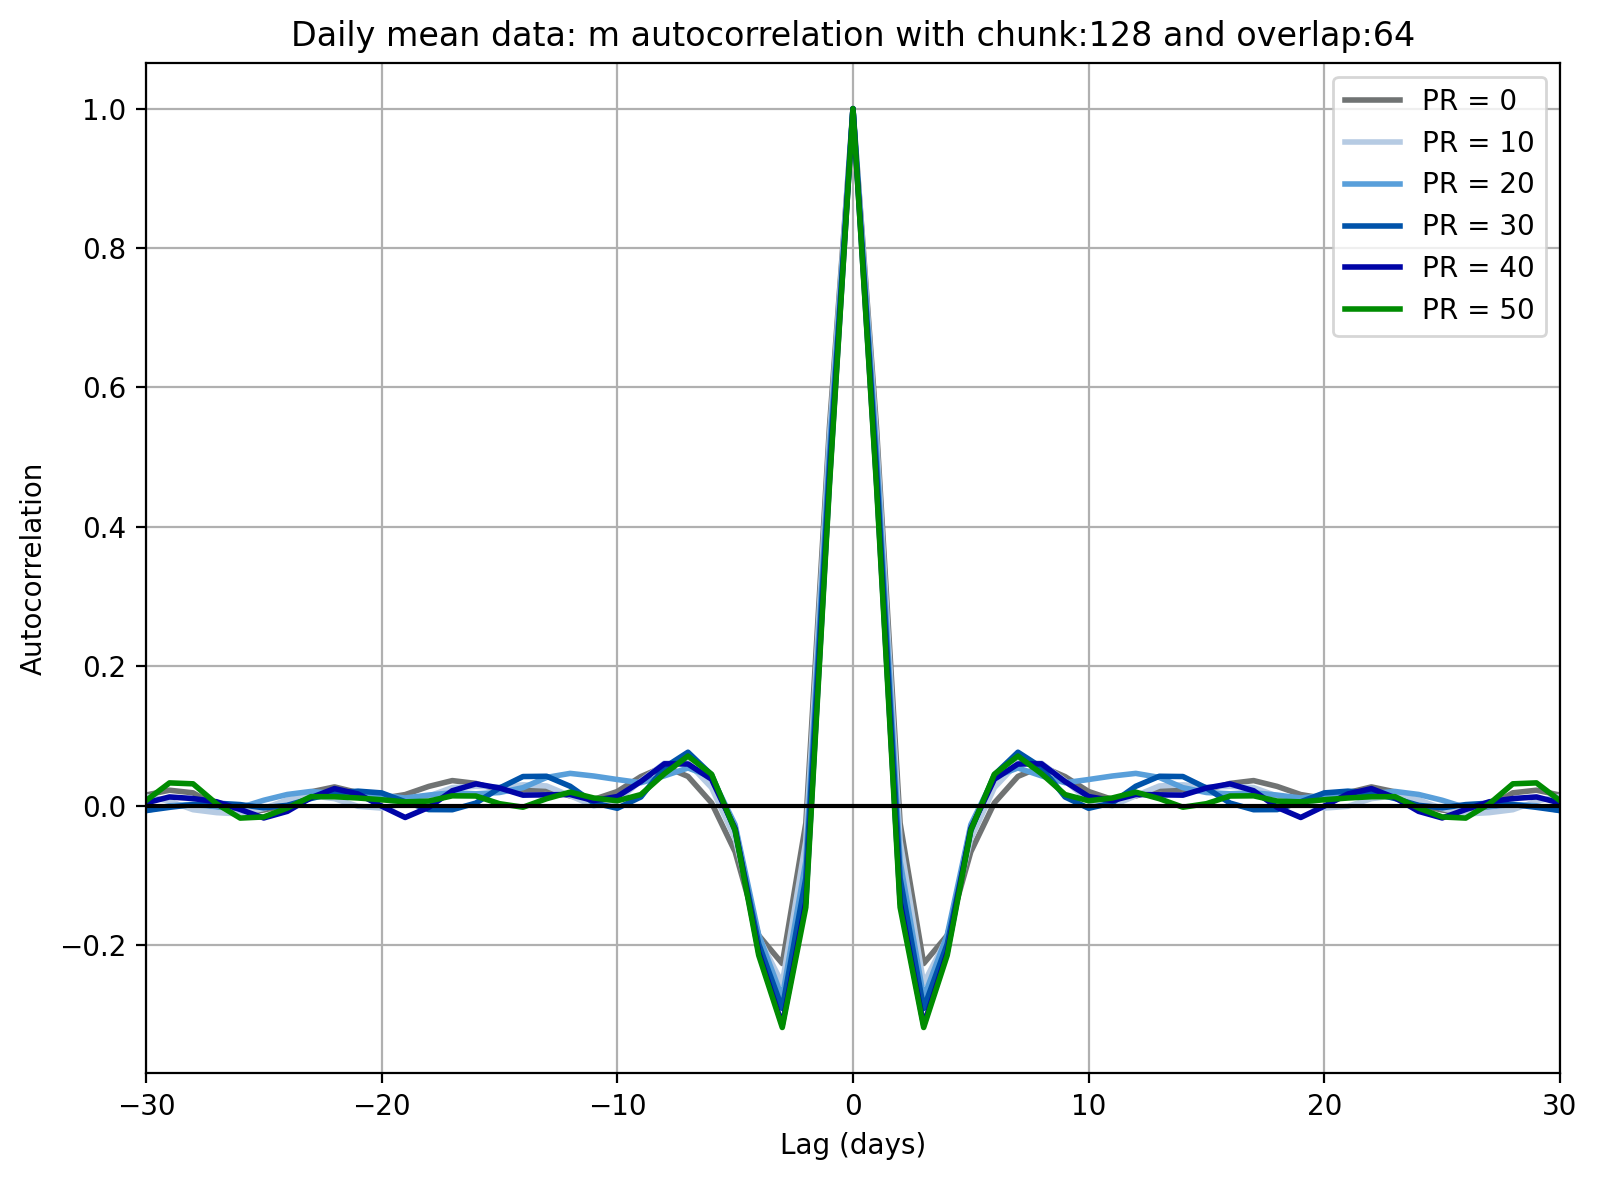

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl

# Constants
radius = 6.37122e6
y = np.linspace(-90, 90, 64)
yd = np.deg2rad(y)
cy = np.cos(yd)
PR_values = range(0, 60, 10)  # PR values from 0 to 50

# Colors for different PR values
colors = np.array([[112,115,115],[182,203,227],[89,159,218],[0,83,170],[0,4,167],[0,140,1]]) / 255

# Function to calculate EOF and PC
def Cal_EOF_PC(input_data):
    from EOF import EOF
    
    input_data_weighted = input_data * np.sqrt(np.cos(np.deg2rad(np.linspace(0, 90, input_data.shape[2]))))
    n_component = min(input_data.shape[0], input_data.size // input_data.shape[0])

    eof_instance = EOF((input_data_weighted,), n_components=n_component, field="2D")
    eof_instance.get()

    EOF1, EOF2 = eof_instance.EOF[:2]
    PC1, PC2 = eof_instance.PC[:2]

    PC1_norm, PC2_norm = (PC1 - PC1.mean()) / PC1.std(), (PC2 - PC2.mean()) / PC2.std()
    EOF1_norm, EOF2_norm = EOF1 * PC1.std(), EOF2 * PC2.std()
    
    return EOF1_norm.reshape(20,32), PC1_norm, EOF2_norm.reshape(20,32), PC2_norm, eof_instance.explained[:10]

# Function to calculate autocorrelation with chunking and overlap
def autocorr_chunked_overlap(x, lags, chunk_size, overlap_size):
    step_size = chunk_size - overlap_size
    num_chunks = (len(x) - overlap_size) // step_size
    corr = np.zeros(int(lags))

    for i in range(num_chunks):
        start = i * step_size
        end = start + chunk_size
        x_chunk = x[start:end]
        chunk_corr = np.zeros(int(lags))
        for l in range(lags):
            if l == 0:
                chunk_corr[l] = 1.
            else:
                chunk_corr[l] = np.corrcoef(x_chunk[l:], x_chunk[:-l])[0][1]
        corr += chunk_corr

    corr /= num_chunks
    return np.array(corr)

# Initialize the plot
fig, ax = plt.subplots(1, figsize=(8, 6), dpi=200)

# Loop over PR values
for idx, PR in enumerate(PR_values):
    # Load EMF and u data
    emf_file = f"/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/PR{PR}/EMF/PR{PR}_500_20000day_EMF_zonal_mean_daily.dat"
    with h5py.File(emf_file, "r") as u_file0:
        EMF = np.asarray(u_file0["EMF"][:,:,:])

    u_file = f"/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/PR{PR}/u/PR{PR}_500_20000day_u_zonal_mean_daily.dat"
    with h5py.File(u_file, "r") as u_file0:
        u = np.asarray(u_file0["u"][:,:,:])

    # Calculate EOF and PC
    EOF1, PC1, EOF2, PC2, explained_variance = Cal_EOF_PC(u[:,:,32:])

    # Prepare data for autocorrelation
    dmdy = np.zeros((6, 19500, 20, 64))
    for a in range(1):
        Mzm = EMF
        for i in range(1, 64-1):
            Mzm[:,:,i] = cy[i]**0.5 * Mzm[:,:,i]
        
        for i in range(1, 64-1):
            dmdy[a,:,:,i] = -(Mzm[:,:,i+1] * (cy[i]**2) - Mzm[:,:,i-1]* (cy[i]**2)) / (radius * (cy[i]**2) * (yd[i+1] - yd[i-1]))
        dmdy[a,:,:,0] = -(Mzm[:,:,1]* (cy[i]**2) - Mzm[:,:,0]* (cy[i]**2)) / (radius * cy[i]**2 *(yd[1] - yd[0]))
        dmdy[a,:,:,-1] = -(Mzm[:,:,-1]* (cy[i]**2) - Mzm[:,:,-2]* (cy[i]**2)) / (radius * cy[i]**2 *(yd[-1] - yd[-2]))

    m = EOF1.reshape(20*32).dot(dmdy[0,:,:,32:].reshape(19500, 32*20).T)
    m_final = (m - m.mean()) / m.std()

    auto_length = 100
    chunk_size = 128  # Set your chunk size here
    overlap_size = 64  # Set your overlap size here
    yyy_thin  = autocorr_chunked_overlap(m[:], auto_length, chunk_size, overlap_size) 

    tau_full = np.arange(-auto_length+1,auto_length,1)
    yyy_thin_full = np.zeros(int(auto_length-1)*2+1) # 41
    yyy_thin_full[int((len(yyy_thin_full)+1)/2):]   = yyy_thin[1:]
    yyy_thin_full[:int((len(yyy_thin_full)+1)/2)]  = yyy_thin[::-1]

    # Plot the result for the current PR value
    ax.plot(tau_full, yyy_thin_full, label=f"PR = {PR}", color=colors[idx], lw=2)

# Finalize and show the plot
ax.set_xlabel("Lag (days)")
ax.set_ylabel("Autocorrelation")
ax.legend()
ax.set_title(f"Daily mean data: m autocorrelation with chunk:{chunk_size} and overlap:{overlap_size}")

plt.tight_layout()
plt.grid()
plt.hlines(y=0, xmin=-100,xmax=100, lw=1.5, color="Black")
plt.xlim([-30,30])
plt.show()


In [129]:
idx = np.where(yyy_thin_full == yyy_thin_full.min())[0][1]
tau_full[idx]

3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
import matplotlib.cm as cm
import datetime 
import time
from scipy.fft import fft, ifft, fftshift
from scipy.fftpack import fftfreq
import gc
import matplotlib.colors as colors
import matplotlib as mpl

# Constants
radius = 6.37122e6
y = np.linspace(-90, 90, 64)
yd = np.deg2rad(y)
cy = np.cos(yd)
PR_values = range(0, 60, 10)  # PR values from 0 to 50

# Colors for different PR values
colors = np.array([[112,115,115],[182,203,227],[89,159,218],[0,83,170],[0,4,167],[0,140,1]]) / 255

# Function to calculate EOF and PC
def Cal_EOF_PC(input_data):
    from EOF import EOF
    
    input_data_weighted = input_data * np.sqrt(np.cos(np.deg2rad(np.linspace(0, 90, input_data.shape[2]))))
    n_component = min(input_data.shape[0], input_data.size // input_data.shape[0])

    eof_instance = EOF((input_data_weighted,), n_components=n_component, field="2D")
    eof_instance.get()

    EOF1, EOF2 = eof_instance.EOF[:2]
    PC1, PC2 = eof_instance.PC[:2]

    PC1_norm, PC2_norm = (PC1 - PC1.mean()) / PC1.std(), (PC2 - PC2.mean()) / PC2.std()
    EOF1_norm, EOF2_norm = EOF1 * PC1.std(), EOF2 * PC2.std()
    
    return EOF1_norm.reshape(20,32), PC1_norm, EOF2_norm.reshape(20,32), PC2_norm, eof_instance.explained[:10]

# Function to calculate cross-correlation
def cross_corr(x, y, lag_max):
    corr = np.correlate(x, y, mode='full')
    lags = np.arange(-lag_max, lag_max + 1)
    mid = len(corr) // 2
    corr = corr[mid-lag_max:mid+lag_max+1] / (len(x) * np.std(x) * np.std(y))
    return lags, corr

# Initialize the plot
fig, ax = plt.subplots(1, figsize=(8, 6), dpi=200)
lag_max = 100  # Maximum lag to consider
cross_corr_values_array = np.zeros((6, lag_max * 2 + 1))
aa = 0
# Loop over PR values
for idx, PR in enumerate(PR_values):
    print(f"Processing PR={PR}")
    
    # Load EMF and u data
    emf_file = f"/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/PR{PR}/EMF/PR{PR}_500_20000day_EMF_zonal_mean_daily.dat"
    with h5py.File(emf_file, "r") as u_file0:
        EMF = np.asarray(u_file0["EMF"][:,:,:])

    u_file = f"/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/PR{PR}/u/PR{PR}_500_20000day_u_zonal_mean_daily.dat"
    with h5py.File(u_file, "r") as u_file0:
        u = np.asarray(u_file0["u"][:,:,:])

    # Calculate EOF and PC
    EOF1, PC1, EOF2, PC2, explained_variance = Cal_EOF_PC(u[:,:,32:])
    
    print(f"Calculated EOF and PC for PR={PR}")

    # Prepare data for cross-correlation
    dmdy = np.zeros((1, 19500, 20, 64))
    for a in range(1):
        Mzm = EMF
        Mzm = cy**0.5 * Mzm
        
        for i in range(1, 64-1):
            dmdy[a,:,:,i] = -(Mzm[:,:,i+1] * (cy[i]**2) - Mzm[:,:,i-1]* (cy[i]**2)) / (radius * (cy[i]**2) * (yd[i+1] - yd[i-1]))
        dmdy[a,:,:,0] = -(Mzm[:,:,1]* (cy[i]**2) - Mzm[:,:,0]* (cy[i]**2)) / (radius * cy[i]**2 *(yd[1] - yd[0]))
        dmdy[a,:,:,-1] = -(Mzm[:,:,-1]* (cy[i]**2) - Mzm[:,:,-2]* (cy[i]**2)) / (radius * cy[i]**2 *(yd[-1] - yd[-2]))

    print(f"Calculated dmdy for PR={PR}")

    m = EOF1.reshape(20*32).dot(dmdy[0,:,:,32:].reshape(19500, 32*20).T)
    m_final = (m - m.mean()) / m.std()

    PC1_final = (PC1 - PC1.mean()) / PC1.std()

    # Calculate cross-correlation between PC1 and m
    lags, cross_corr_values = cross_corr(m_final, PC1_final, lag_max)
    print(cross_corr_values.shape)
    cross_corr_values_array[aa,:] = cross_corr_values
    aa += 1

    # Plot the result for the current PR value
    ax.plot(lags, cross_corr_values, label=f"PR = {PR}", color=colors[idx], lw=2)

# Finalize and show the plot
ax.set_xlabel("Lag (days)")
ax.set_ylabel("Cross-correlation")
ax.legend()
ax.set_title("Cross-correlation of PC1 and m for Different PR values")
plt.tight_layout()
plt.grid()
plt.hlines(y=0, xmin=-100,xmax=100, lw=1.5, color="Black")
plt.show()


Processing PR=0
Calculated EOF and PC for PR=0
Calculated dmdy for PR=0
(201,)
Processing PR=10
Calculated EOF and PC for PR=10
Calculated dmdy for PR=10


In [22]:
cross_corr_values_array.shape
aa = 0
for pr in range(0,60,10):
    test = (cross_corr_values_array[aa][200:][15:20].mean() - cross_corr_values_array[aa][200:][125:175].mean())
    aa += 1
    print(f"when PR={pr}", "cross correlation (15~20) - (125~175): ", round(test,3))

# lags[200]

when PR=0 cross correlation (15~20) - (125~175):  0.226
when PR=10 cross correlation (15~20) - (125~175):  0.127
when PR=20 cross correlation (15~20) - (125~175):  0.154
when PR=30 cross correlation (15~20) - (125~175):  0.173
when PR=40 cross correlation (15~20) - (125~175):  0.14
when PR=50 cross correlation (15~20) - (125~175):  0.148


In [5]:
cross_corr_values_array.shape

(6, 201)

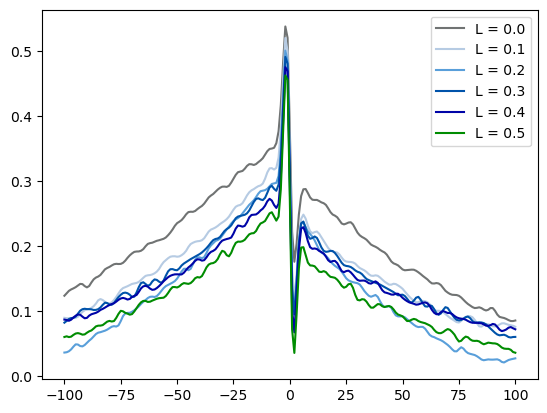

In [11]:
plt.figure()
for i in range(6):
    plt.plot(lags, cross_corr_values_array[i], color=colors[i], label=f"L = {round(i*0.1, 3)}")
plt.legend()

In [84]:
from scipy.ndimage import gaussian_filter1d

window_size = 1
sigma = 1  # Standard deviation for Gaussian kernel


In [85]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

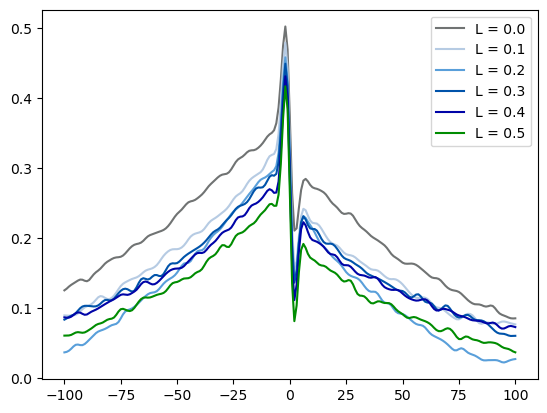

In [86]:
plt.figure()
for i in range(6):
    tau_test      = running_mean(cross_corr_values_array[i], window_size)
    freq_adjusted = running_mean(lags, window_size)
    # Apply Gaussian filter
    spectrum_gaussian = gaussian_filter1d(tau_test, sigma=sigma)
    plt.plot(lags[:], spectrum_gaussian, color=colors[i], label=f"L = {round(i*0.1, 3)}")
plt.legend()